# 플롯 범례 맞춤 변경
* 범례를 만들고
* 다양한 색상을 반영하는 플롯을 그릴 수 있다

## 범례 기초

### 간단한 범례 만들기

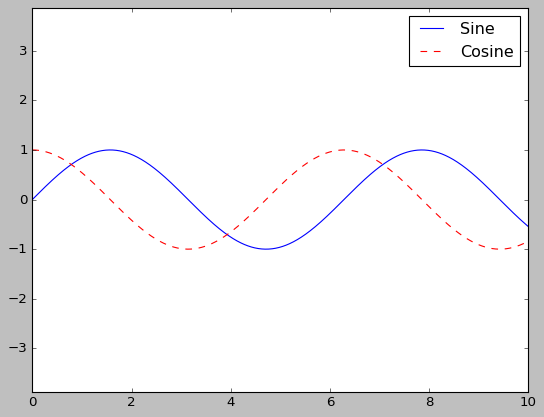

In [8]:
import matplotlib.axes
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

x = np.linspace(0,10,1000)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '-b', label = 'Sine') # 파란색 실선
ax.plot(x, np.cos(x), '--r', label = 'Cosine') #빨간색 점선
ax.axis('equal')
leg = ax.legend();

### 범례 테두리 없애기 

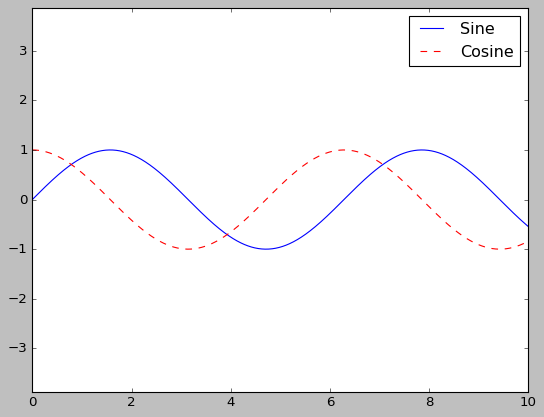

In [14]:
ax.legend(loc='upper right', frameon=True)
fig

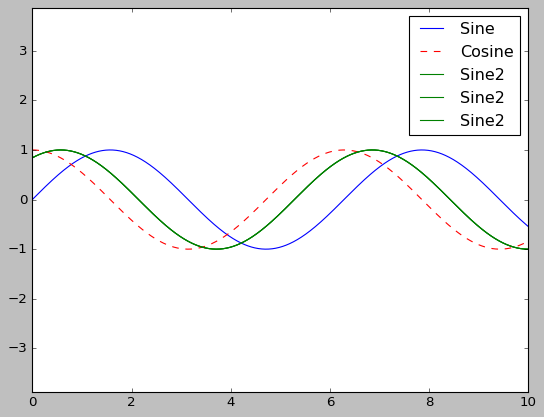

In [17]:
ax.plot(x, np.sin(x+1), '-g', label = 'Sine2')
leg = ax.legend();
fig

### 범례에 사용되는 열의 개수 지정

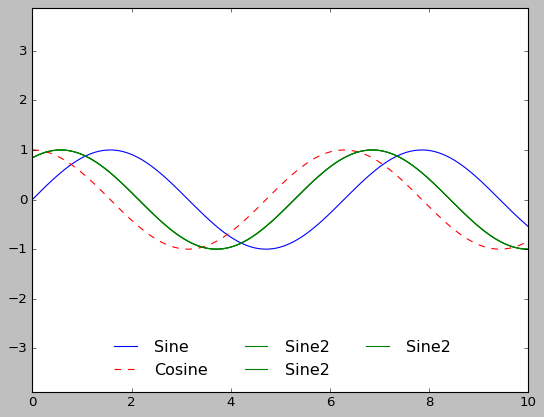

In [20]:
ax.legend(frameon=False, loc='lower center', ncol=3)
fig

###  범례 테두리 Fancy 하게!

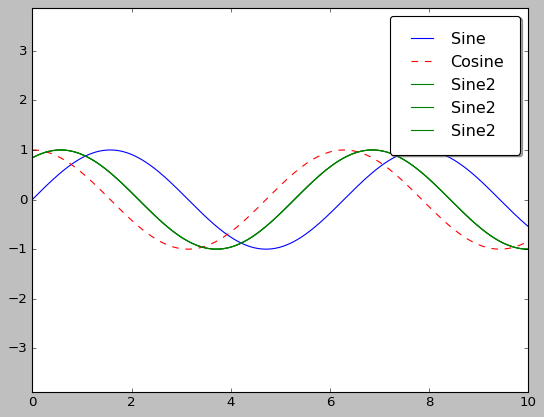

In [25]:
ax.legend(fancybox=True, framealpha=1, shadow = True, borderpad=1)
fig

## 범례 요소 선택
* plt.plot()을 이용해서
* 인스턴스 목록을 반환
* 각 인스턴스에 대한 속성을 지정

In [31]:
np.arange(0,2,0.5).shape

(4,)

In [32]:
y= np.sin(x[:, np.newaxis]+np.pi*np.arange(0,2,0.5)) # broad casting에 의해 0.5pi씩 떨어진 4개의 프로필이 만들어진다. 
y.shape

(1000, 4)

In [38]:
y[:,[0,1]].shape

(1000, 2)

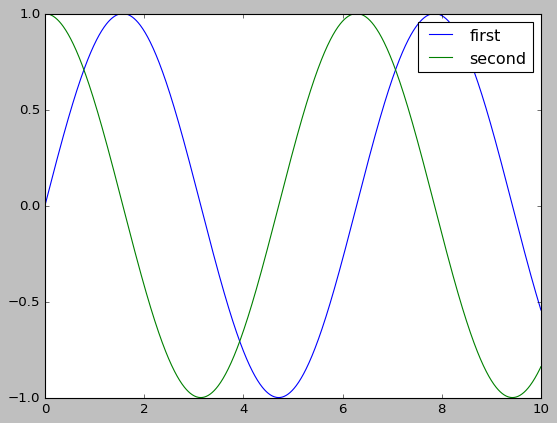

In [40]:
lines = plt.plot(x,y[:,[0,1]]) # 인스턴스 목록을 받고 plt.legend로 전달한다. 
plt.legend(lines[:2], ['first', 'second']); # 4 개의 라인에 대해서 두개만 범례를 붙여 보자

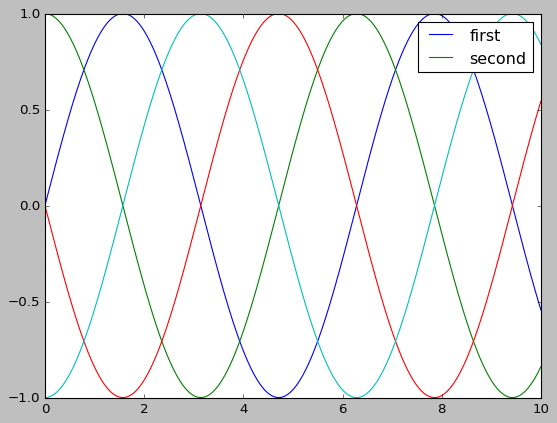

In [45]:
# 위의 방법과 다른 방법으로 하는 방법
plt.plot(x,y[:,0], label='first')
plt.plot(x,y[:,1], label='second')
plt.plot(x,y[:,2])
plt.plot(x,y[:,3])
plt.legend(framealpha=1, frameon=True);

## 점 크기에 대한 범례
* 데이터의 특징을 점으로 표현하고 싶다!
* 나만의 맞춤형 범례를 만들고 싶다. 어떻게 해야 되나?
* 항목없는 레이블을 가진 데이터를 플로팅

In [46]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [47]:
lat, lon = cities['latd'], cities['longd']
lat

0      34.576111
1      34.153333
2      37.756111
3      37.886944
4      34.081944
         ...    
477    38.403056
478    41.726667
479    39.134722
480    34.030278
481    34.133333
Name: latd, Length: 482, dtype: float64

In [48]:
population, area = cities['population_total'], cities['area_total_km2']

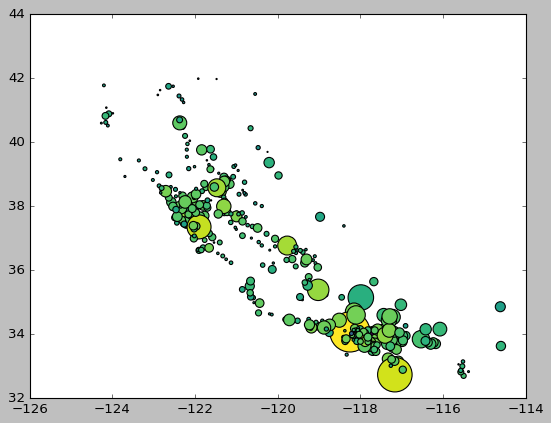

In [56]:
fig, ax = plt.subplots()
plt.scatter(lon, lat,  c=np.log10(population),  cmap='viridis', s=area);

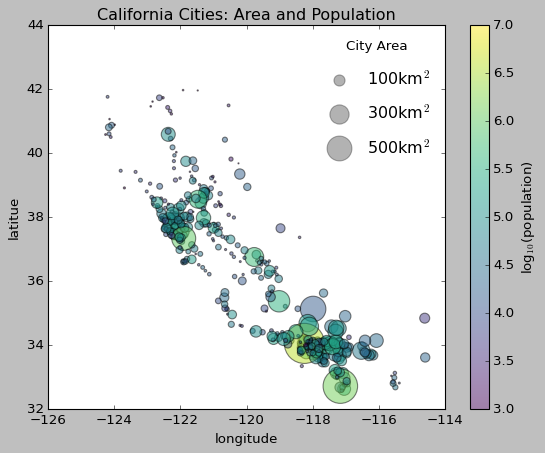

In [59]:
plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=1, alpha=0.5)


ax.set_aspect('equal')
plt.xlabel('longitude')
plt.ylabel('latitue')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7) # set the color limits

#범례 생성
# 원하는 크기와 레이블로 빈 리스트를 플로팅
# 이부분이 핵심 : 범례를 만들기 위해서 가짜로 플로팅하였음
for area in [100, 300, 500]:
    plt.scatter([],[], c='k', alpha=0.3, s=area,
                label=str(area) + 'km$^2$')

plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## 다중 범례
* 동일한 축에 여러개의 범례를 추가하고 싶다.
* 두번재 범례를 만들고 직접 아티스트를 추가해야 한다.

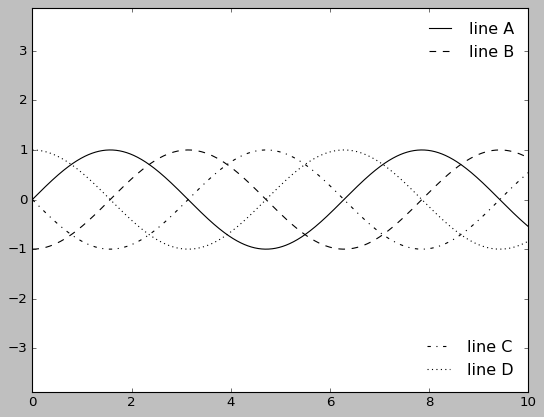

In [9]:
fig, ax = plt.subplots()

lines=[]
styles =['-','--', '-.',':']
x = np.linspace(0,10,1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x-i*np.pi /2), styles[i], color='black')
ax.axis('equal')

#첫번째 범례의 라인과 레이블을 지정
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

#Error Case
# ax.legend(lines[2:], ['line C', 'line D'],
#           loc='lower right', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax,lines[2:], ['line C', 'line D'], loc = 'lower right', frameon=False)
ax.add_artist(leg);

## 색상 막대 맞춤 변경하기

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
%matplotlib inline

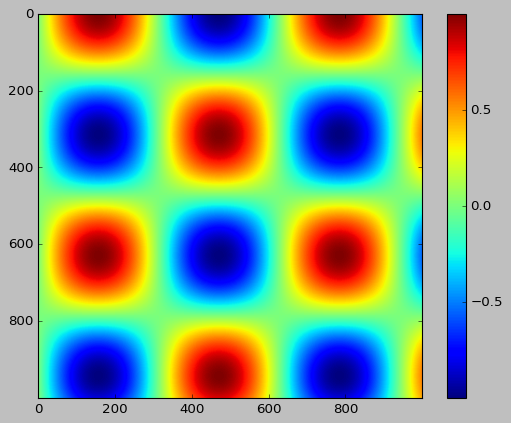

In [11]:
x = np.linspace(0,10,1000)
I=np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar();

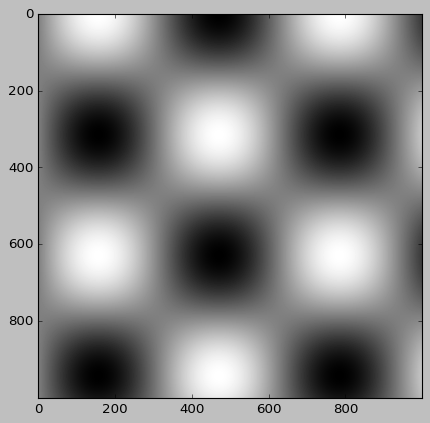

In [12]:
plt.imshow(I, cmap='gray')

### 색상 지도 선택하기
* 순차적 색상 지도
* 발산적 색상 지도
* 정성적 색상 지도


C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap(cmap)
C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap) # jet 컬러맵 객체 생성


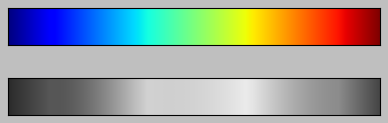

In [60]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """색상 지도의 회색 조 버전을 반환"""
    cmap = plt.cm.get_cmap(cmap) # jet 컬러맵 객체 생성
    colors = cmap(np.arange(cmap.N)) # 포인트에 대한 RGBA 반환 (256,4)

    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] **2, RGB_weight)) # (256,1)
    colors[:, :3] = luminance[:, np.newaxis] # RGB를 동일한 값으로 변경

    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N) # 컬러맵 생성후 반환

def view_colormap(cmap):
    cmap=plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6,2),
                           subplot_kw=dict(xticks=[], yticks=[])) # 2개의 subplot 생성
    ax[0].imshow([colors], extent=[0,10,0,1]) # show images with bounding box
    ax[1].imshow([grayscale], extent=[0,10,0,1])

view_colormap('jet')

C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap(cmap)
C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap) # jet 컬러맵 객체 생성


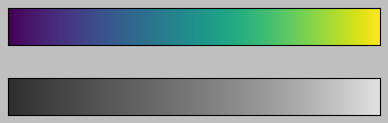

In [62]:
view_colormap('viridis')

C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap(cmap)
C:\Users\231610\AppData\Local\Temp\ipykernel_4656\1707834980.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap) # jet 컬러맵 객체 생성


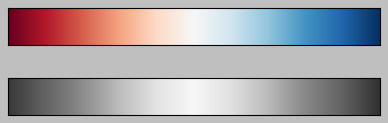

In [64]:
view_colormap('RdBu')

## 색상 한계 및 확장

* 노이즈가 포함된 점을 생성하는 방법을 이해할 수 있다.

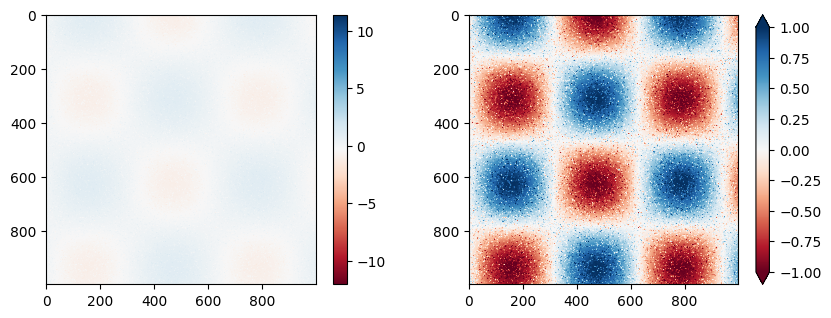

In [24]:
import matplotlib.pyplot as plt
# 이미지 픽셀의 1% 노이즈 생성
speckles = (np.random.random(I.shape)<0.01) # 확률을 주어서 True, False 생성
I[speckles]= np.random.normal(0,3,np.count_nonzero(speckles)) # True 가 있는 부분에 평균0, 표준편차3의 random 생성

plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()


plt.subplot(1,2,2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

## 불연속적인 색상 막대
* 불연속인 값을 표현하고 싶을 때
* plt.cm.get_cmap() 함수에 구간(bin)의 개수를 전달한다.

In [18]:
import numpy as np
x = np.linspace(0,10,1000) # x 생성
I=np.sin(x)*np.cos(x[:,np.newaxis]) #  주어진 x에 대해서 I 생성 (1000, ) * (1000, 1) = (1000,1000) 생성
speckles = (np.random.random(I.shape)<0.01) # 노이즈 생성
I[speckles]= np.random.normal(0,3,np.count_nonzero(speckles))

C:\Users\231610\AppData\Local\Temp\ipykernel_11616\1026297525.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


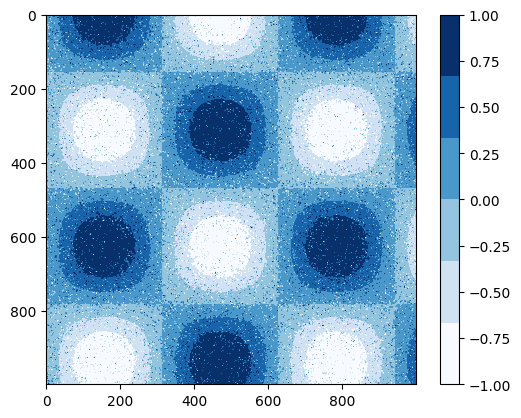

In [29]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1,1)

## 예제: 손으로 쓴 숫자

* 64차원을 점을 2차원으로 축소시키는 방법과 이를 불연속인 색상표를 사용해 그림으로 표현한다. 
* Scikit-Learn에 포함된 예제 데이터를 로드할 수 있다. 
* plt.subplots을 만들고 각 subplot에 그림을 그린다.
* digits.images의 데이터를 그릴 수 있다 (= digits["images"])
* digits.images[i].shape의 형태를 이해한다
* manifold에 의한 차원 축소를 이해한다. 
* digits.images와 digits.data의 차이점을 이해한다

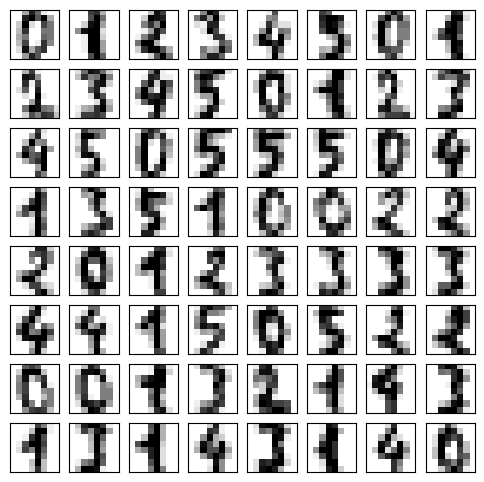

In [57]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)
fig, ax = plt.subplots(8,8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [81]:
# https://www.cs.cmu.edu/~efros/courses/AP06/presentations/melchior_isomap_demo.pdf
from sklearn.manifold import Isomap
iso = Isomap(n_components =2)
projection = iso.fit_transform(digits.data)

E:\dev\pythondatascience\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
E:\dev\pythondatascience\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


C:\Users\231610\AppData\Local\Temp\ipykernel_11616\599341499.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6), edgecolors='k')


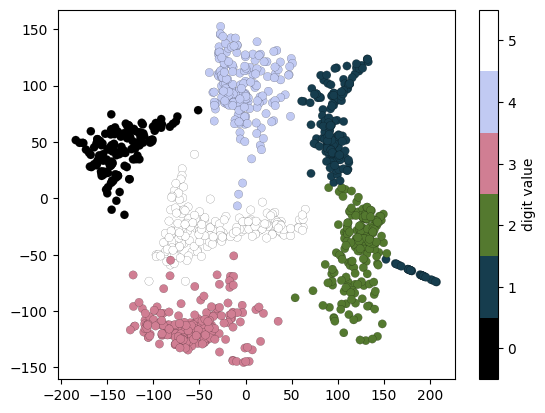

In [67]:
plt.scatter(projection[:,0], projection[:,1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6), edgecolors='k')
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

# 다중 서브 플롯
* 비교하고 싶은 그래프를 한 그래프뷰에 모두 보고 싶을 때 사용한다.
* 서브 플롯을 이용해 서로 다른 데이터뷰를 비교한다.

In [75]:
# 기본 세팅
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

C:\Users\231610\AppData\Local\Temp\ipykernel_11616\2272414075.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## plt.axes
* 축을 생성한다. 

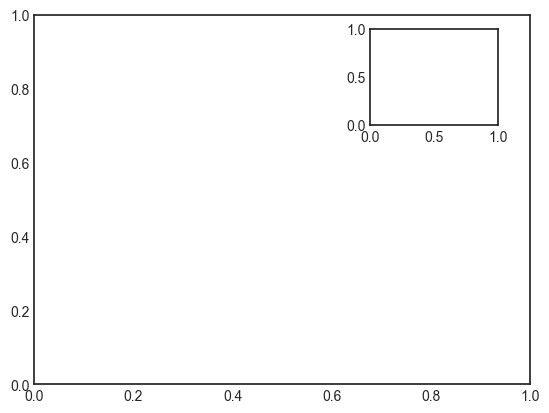

In [74]:
ax1 = plt.axes() # 기본 축
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) # 그림 너비/높이의 65%에서 시작하고 크기를 너비/높이 각20% 로 설정한다.

## add_axes
* 축을 추가로 생성한다. 

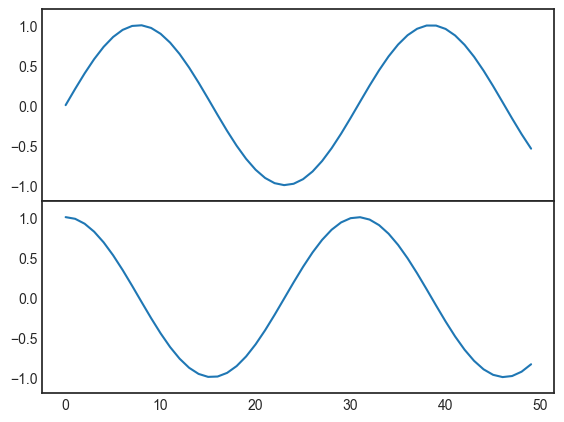

In [77]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5, 0.8, 0.4], 
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4],
                   ylim=(-1.2, 1.2))
x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

## 간단한 서브플롯의 그리드
* 서브플롯의 그리드 개념을 이해한다. 
* plt.subplot(2,3,i)를 이해한다.
* add_subplot을 이용해도 그래프를 그린다

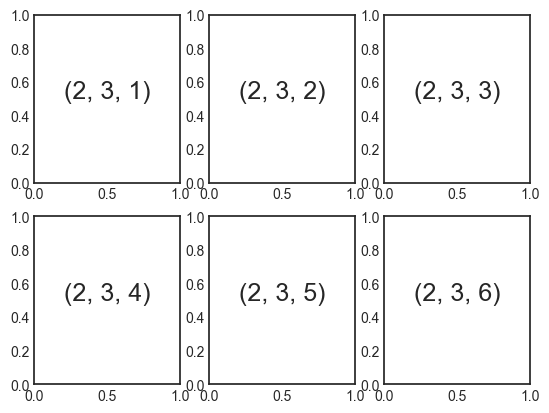

In [85]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5, str((2,3,i)),
    fontsize=18, ha='center')

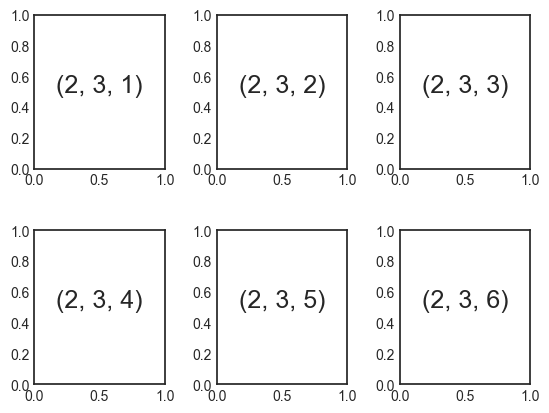

In [90]:
# add_subplot을 이용해 그리기

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5, str((2,3,i)),
    fontsize=18, ha='center')

## 한번에 전체 그리드 만들기
* plt.subplots를 활용해서 축을 여러개 생성한다.

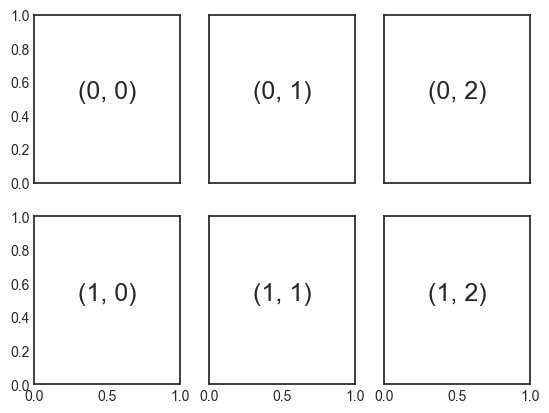

In [92]:
fig, ax = plt.subplots(2,3, sharex='col', sharey='row')

for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5,0.5, str((i,j)),
                     fontsize=18, ha='center')

## 복잡한 배치
* x,y=np.random.multivariate_normal(mean,cov,3000).T 의미를 이해할 수 있다.
* fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax) 의미를 이해할 수 있다.
* main_ax = fig.add_subplot(grid[:-1,1:]) 의미를 이해할 수 있다.

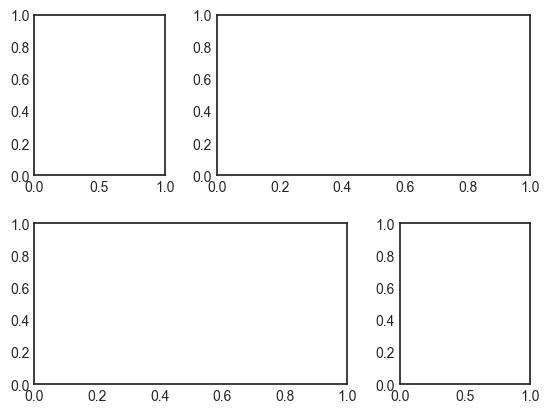

In [129]:
grid = plt.GridSpec(2,3,wspace=0.4, hspace=0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

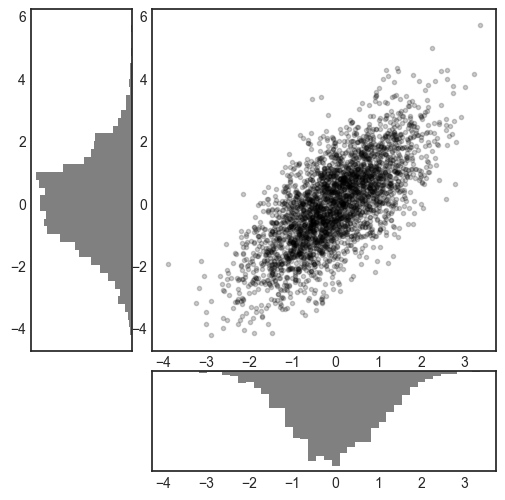

In [130]:
#정규분포 데이터 만들기
mean = [0,0]
cov = [[1,1],[1,2]] # x의 분산은 1, y의 분산은 2
x,y=np.random.multivariate_normal(mean,cov,3000).T

#gridspec으로 축 설정하기
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels=[], sharex=main_ax)

#메인 축에 점 산포하기
main_ax.plot(x,y,'ok', markersize=3, alpha=0.2)

#보조 축상에 히스토그램 만들기
x_hist.hist(x,40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y,40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# 텍스트와 주석

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

C:\Users\231610\AppData\Local\Temp\ipykernel_4068\1908122744.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [47]:
births = pd.read_csv('./data/births.csv')
quartiles = np.percentile(births['births'],[25,50,75])
mu, sig = quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births > @mu - 5* @sig) & (births < @mu+5 *@sig)')
births['day'] = births['day'].astype(int)

In [48]:
# 숙제 나 문제로 출제!!!!
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day, format="%Y%m%d")
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index =[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

C:\Users\231610\AppData\Local\Temp\ipykernel_4068\2308774523.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index =[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]


<Axes: >

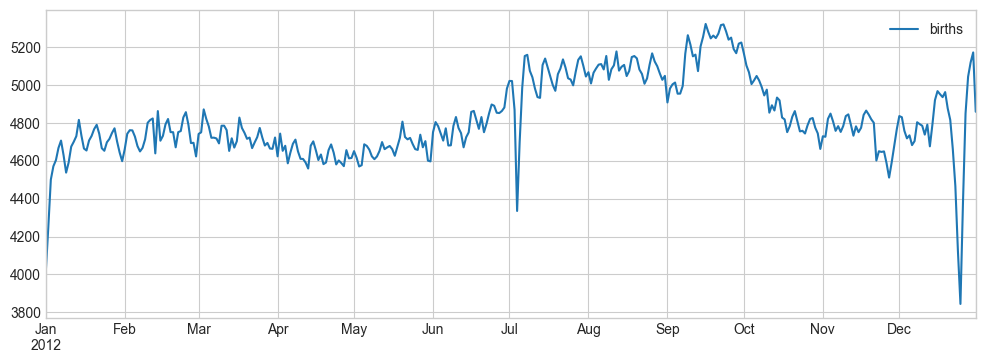

In [49]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

* 주석을 달아보자 
* plt.text 나 ax.text로 주석을 달 수 있다. 

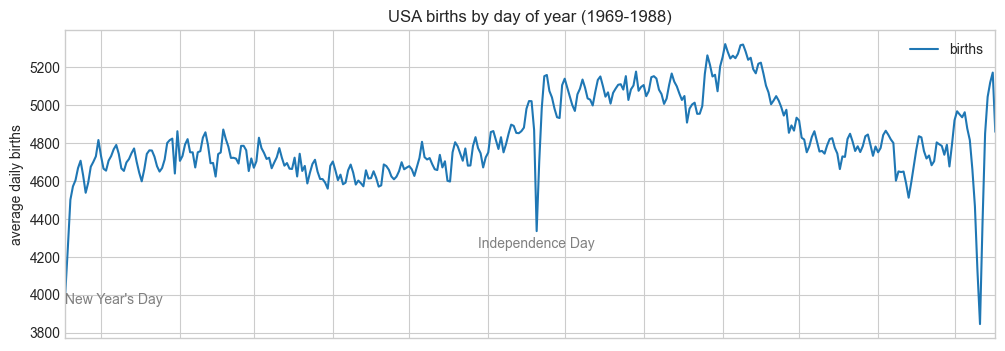

In [62]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day",ha='center', **style)
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

#월레이블 옵션 지정
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));